In [ ]:
# dataset uploaded on dropbox
# we will download our dataset by this link - http://cb.lk//covid_19


!wget http://cb.lk//covid_19

In [ ]:
# unzip the folder

!unzip covid_19

In [41]:
# Train path 

TRAIN_PATH = "CovidDataset/Train"

# Val path

VAL_PATH = "CovidDataset/Test"


In [66]:
# import

import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# CNN Based Model in Keras

In [43]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

## Train the Model

In [45]:
# Train from Scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset  = image.ImageDataGenerator(rescale=1./255)


train_generator  = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [46]:
train_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [47]:

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'

)

Found 60 images belonging to 2 classes.


In [48]:
validation_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [56]:
# number of training images we have are

train_gen.n

224

In [57]:
# number of test images we have are  

validation_generator.n

60

In [59]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 0.0967 - accuracy: 0.9635 - val_loss: 0.0472 - val_accuracy: 0.9833
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 0.1325 - accuracy: 0.9740 - val_loss: 0.0495 - val_accuracy: 0.9833
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.1860 - accuracy: 0.9323 - val_loss: 0.0679 - val_accuracy: 0.9667
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.1476 - accuracy: 0.9323 - val_loss: 0.1431 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.1811 - accuracy: 0.9271 - val_loss: 0.1638 - val_accuracy: 0.9833
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.1626 - accuracy: 0.9583 - val_loss: 0.0867 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1882 - accuracy: 0.9531 - val_loss: 0.0682 - val_accuracy: 0.9667
Epoch 8/10
6/6 [=========================

# Loss is very Less


In [60]:
model.save('model_advance.h5')

In [62]:
model.evaluate_generator(train_generator)

[0.07416538149118423, 0.9776785969734192]

# Test Images

In [63]:
model = load_model('model_advance.h5')

In [64]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [65]:

y_actual = []
y_test = []

In [69]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/" + i , target_size=(224,224) )
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [70]:

for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+ i, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)


In [71]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

# Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [77]:
cm = confusion_matrix(y_actual, y_test)

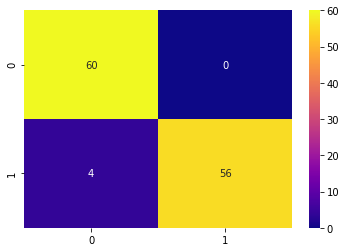

In [78]:
sns.heatmap(cm, cmap='plasma', annot=True)
